words = open("names.txt", "r").read().splitlines(

In [18]:
words = open("names.txt", "r").read().splitlines()


In [ ]:
len(words)

In [ ]:
min(len(w) for w in words)


In [ ]:
max(len(w) for w in words)


In [ ]:
b = {}

for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

In [ ]:
import torch

In [27]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [31]:
chars = sorted(set(''.join(words)))
stoi = {s:i for i, s in enumerate(chars)}
    
stoi['<S>'] = 26
stoi['<E>'] = 27

In [32]:
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        N[ix1, ix2] += 1

In [42]:
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

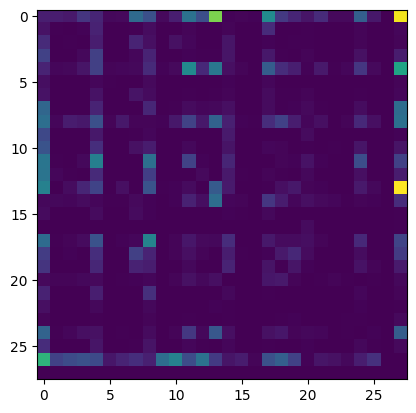

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")

for i in range(26):
    for j in range(26):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="bottom", color="gray")